In [1]:
from pathlib import Path

In [2]:
from dataset import get_loader
from config import Config

In [3]:
from vit import get_vit, SUPPORTED_VIT

from trainer import Trainer

from loss import get_loss, SUPPORTED_LOSS
from optimizer import get_optimizer, SUPPORTED_OPTIMIZERS

In [4]:
celeb_path = Path('./data/CelebA')
train_path = celeb_path / 'train'
test_path = celeb_path / 'test'
val_path = celeb_path / 'validation'

In [5]:
batch_size = 2
image_limit = 1

learning_rate = 1e-4
num_epochs = 1000

debug = True
debug_step = 250
debug_image_count = 2

AUGMENT_DATA = False

In [6]:
print(f'Supported vision transformers: {list(SUPPORTED_VIT.keys())}')
print(f'Supported losses: {list(SUPPORTED_LOSS.keys())}')
print(f'Supported optimizers: {list(SUPPORTED_OPTIMIZERS.keys())}')

Supported vision transformers: ['vit_b32', 'vit_l32', 'vit_h14']
Supported losses: ['L1', 'MSE', 'PSNR']
Supported optimizers: ['ADAM', 'SGD']


In [7]:
model_id = 'vit_b32'

Using ADAM with L1 on vit_b32


Training:   0%|          | 0/1000 [00:00<?, ?epoch/s]

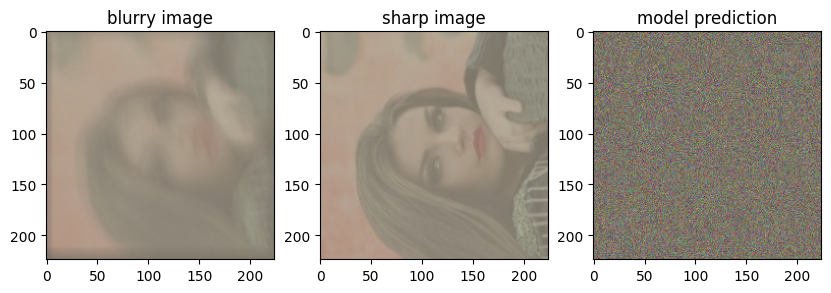

Epoch: 1, Train loss: 0.5841, Validation loss: 0.4903


In [8]:
config = Config(
    model_id=model_id,
    img_size=224,
    train_path=train_path,
    test_path=test_path,
    val_path=val_path,
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

train_loader = get_loader(
    data_path=train_path,
    config=config,
    batch_size=batch_size,
    image_limit=image_limit,
    augment=AUGMENT_DATA
)
val_loader = get_loader(
    data_path=val_path,
    config=config,
    batch_size=batch_size,
    image_limit=image_limit,
    augment=AUGMENT_DATA
)

model = get_vit(config=config)
for criterion_id in SUPPORTED_LOSS:
    criterion = get_loss(criterion_id)
    for optimizer_id in SUPPORTED_OPTIMIZERS:
        optimizer = get_optimizer(
            optimizer_id=optimizer_id,
            model=model,
            learning_rate=learning_rate
        )
        print(f'Using {optimizer_id} with {criterion_id} on {model_id}')
        trainer = Trainer(
            model_id=model_id,
            model=model,
            optimizer=optimizer,
            criterion=criterion,
            config=config,
            debug=debug,
            debug_step=debug_step,
            debug_image_count=debug_image_count
        )
        trainer.train(
            train_loader=train_loader,
            val_loader=val_loader,
            epochs=num_epochs
        )